<a href="https://colab.research.google.com/github/ramaoutlook/Thyroid-Cancer-Detection-ML-Model-Unified-Mentor-Internship/blob/main/Thyroid_Cancer_Recurrence_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thyroid Cancer Recurrence Prediction Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset
df = pd.read_csv('/content/thyroid_cancer_data.csv')
df.shape

(383, 17)

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [7]:
df.columns.tolist()

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [8]:
# Let's check the target variable - this is what we want to predict
df['Recurred'].value_counts()

,count
Recurred,
No,275
Yes,108


In [9]:
# Percentage distribution of target variable
df['Recurred'].value_counts(normalize=True)*100

,proportion
Recurred,
No,71.801567
Yes,28.198433


In [10]:
# Let's look at each column and see what kind of data we have
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:  # Show unique values for categorical columns
        print(f"  Values: {df[col].unique()}")
    print()


Unique values in each column:
Age: 65 unique values

Gender: 2 unique values
  Values: ['F' 'M']

Smoking: 2 unique values
  Values: ['No' 'Yes']

Hx Smoking: 2 unique values
  Values: ['No' 'Yes']

Hx Radiothreapy: 2 unique values
  Values: ['No' 'Yes']

Thyroid Function: 5 unique values
  Values: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Physical Examination: 5 unique values
  Values: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Adenopathy: 6 unique values
  Values: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Pathology: 4 unique values
  Values: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Focality: 2 unique values
  Values: ['Uni-Focal' 'Multi-Focal']

Risk: 3 unique values
  Values: ['Low' 'Intermediate' 'High']

T: 7 unique values
  Values: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

N: 3 unique value

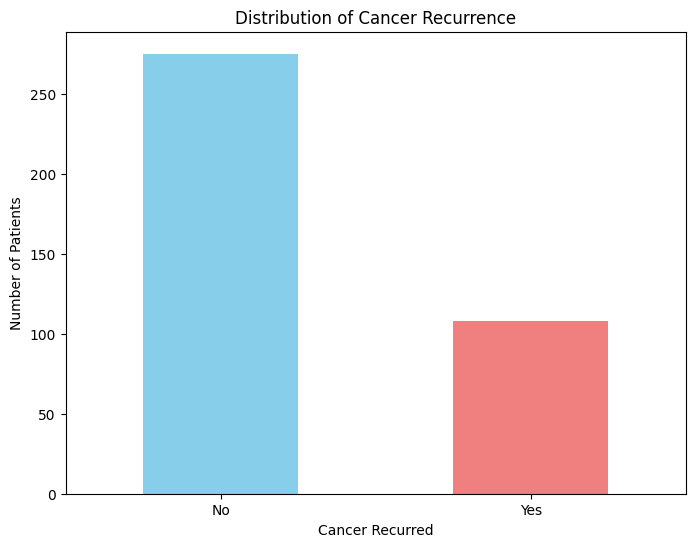

In [11]:
# Let's visualize our target variable
plt.figure(figsize=(8, 6))
df['Recurred'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Cancer Recurrence')
plt.xlabel('Cancer Recurred')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

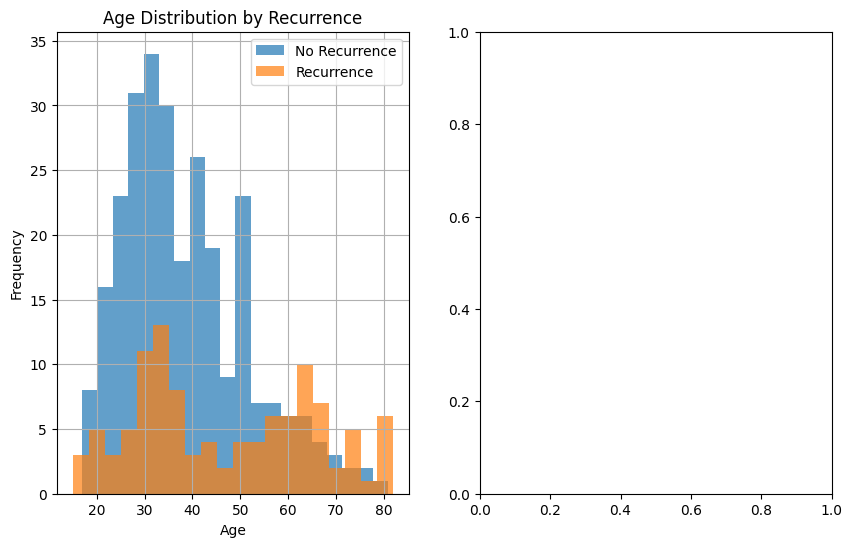

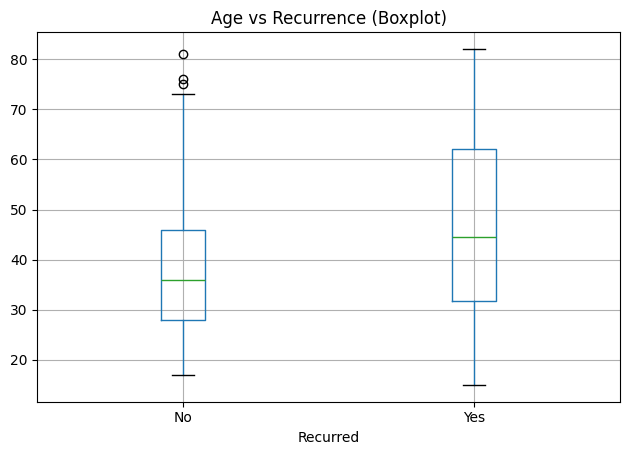

In [12]:
# Let's see if there's any relationship between age and recurrence
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df[df['Recurred'] == 'No']['Age'].hist(alpha=0.7, label='No Recurrence', bins=20)
df[df['Recurred'] == 'Yes']['Age'].hist(alpha=0.7, label='Recurrence', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Recurrence')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='Age', by='Recurred')
plt.title('Age vs Recurrence (Boxplot)')
plt.suptitle('')
plt.tight_layout()
plt.show()

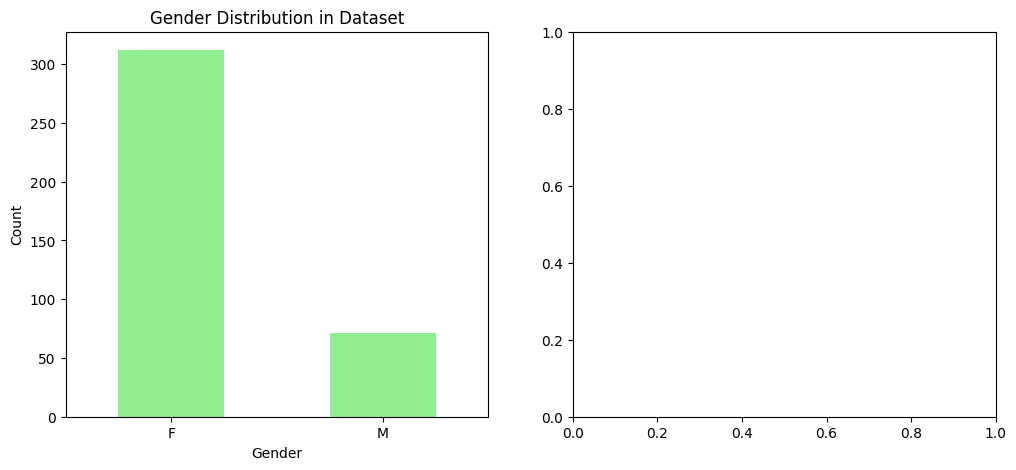

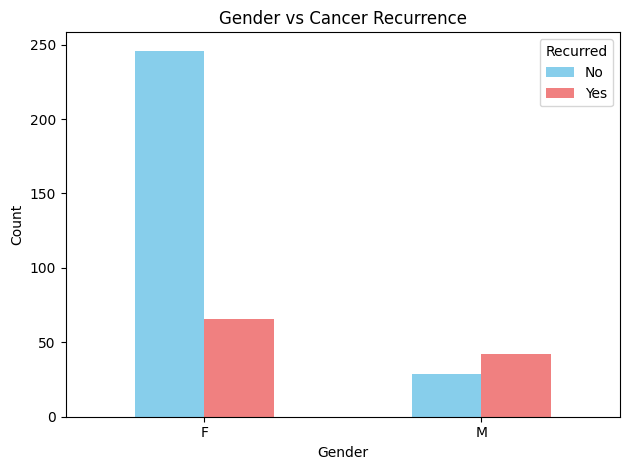

In [13]:
# Let's look at gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
pd.crosstab(df['Gender'], df['Recurred']).plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender vs Cancer Recurrence')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

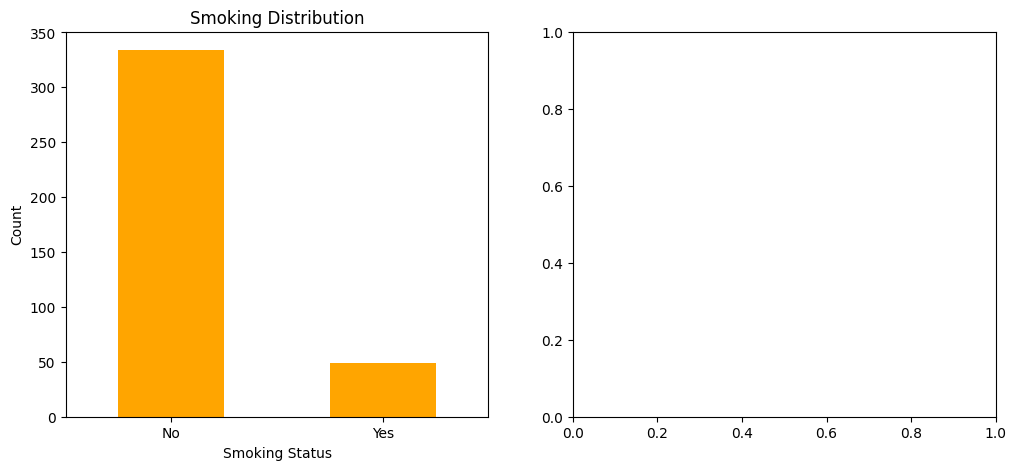

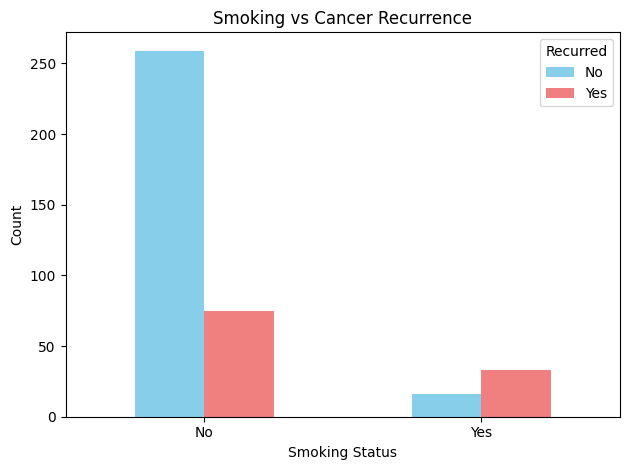

In [14]:

# Let's check smoking and its relationship with recurrence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Smoking'].value_counts().plot(kind='bar', color='orange')
plt.title('Smoking Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
pd.crosstab(df['Smoking'], df['Recurred']).plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Smoking vs Cancer Recurrence')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Risk categories in our data:
Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64


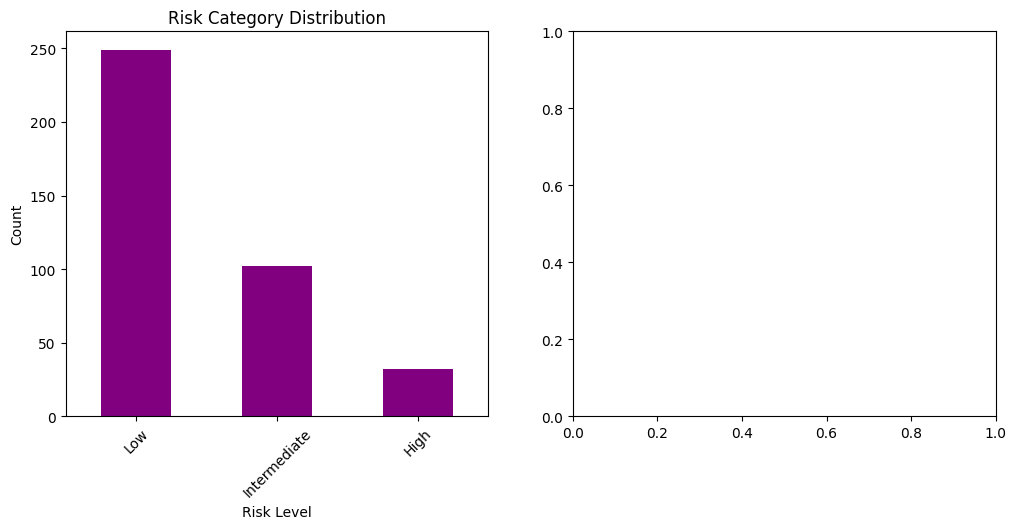

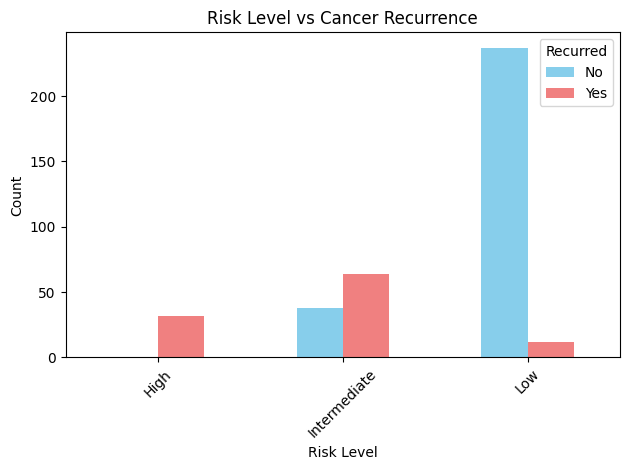

In [15]:
# Let's look at the risk categories
print("Risk categories in our data:")
print(df['Risk'].value_counts())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Risk'].value_counts().plot(kind='bar', color='purple')
plt.title('Risk Category Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.crosstab(df['Risk'], df['Recurred']).plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Risk Level vs Cancer Recurrence')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cancer stages in our data:
Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64


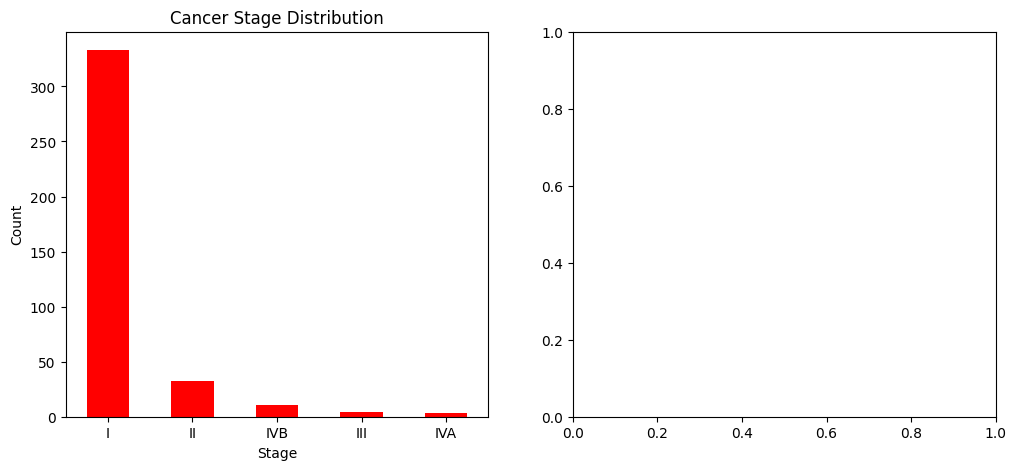

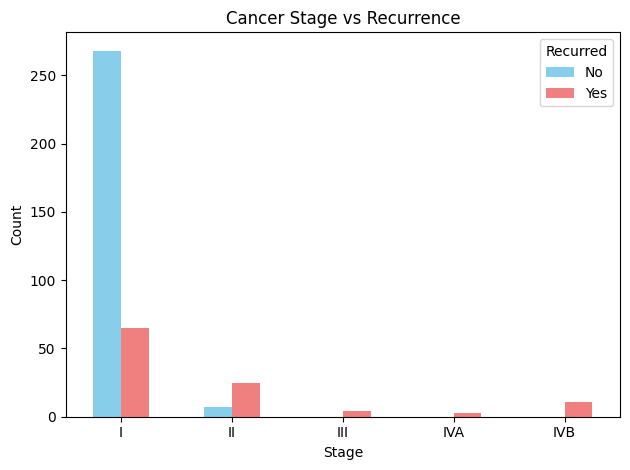

In [16]:
# Let's check the stage information
print("Cancer stages in our data:")
print(df['Stage'].value_counts())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Stage'].value_counts().plot(kind='bar', color='red')
plt.title('Cancer Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
pd.crosstab(df['Stage'], df['Recurred']).plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Cancer Stage vs Recurrence')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# Let's create a correlation heatmap for numerical columns
# First, let's identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

Numerical columns: ['Age']


In [18]:
# Let's separate our features and target
X = df.drop('Recurred', axis=1)  # Features (all columns except target)
y = df['Recurred']  # Target variable

In [19]:
X.shape, y.shape

((383, 16), (383,))

In [20]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [21]:
y.head()

,Recurred
0,No
1,No
2,No
3,No
4,No


In [22]:
# Now we need to handle categorical variables using one-hot encoding
# First, let's identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns that need encoding:", categorical_cols)

Categorical columns that need encoding: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']


In [23]:
# Let's apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [24]:
print(f"Shape after one-hot encoding: {X_encoded.shape}")
print("New columns after encoding:")
print(X_encoded.columns.tolist())

Shape after one-hot encoding: (383, 40)
New columns after encoding:
['Age', 'Gender_M', 'Smoking_Yes', 'Hx Smoking_Yes', 'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hypothyroidism', 'Thyroid Function_Euthyroid', 'Thyroid Function_Subclinical Hyperthyroidism', 'Thyroid Function_Subclinical Hypothyroidism', 'Physical Examination_Multinodular goiter', 'Physical Examination_Normal', 'Physical Examination_Single nodular goiter-left', 'Physical Examination_Single nodular goiter-right', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Uni-Focal', 'Risk_Intermediate', 'Risk_Low', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N1a', 'N_N1b', 'M_M1', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete']


In [25]:
X_encoded.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,30,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,62,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,62,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [26]:
# Let's also encode our target variable (Yes/No to 1/0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Target variable encoding:")
print("Original values:", y.unique())
print("Encoded values:", np.unique(y_encoded))
print("Encoding mapping: 0 =", label_encoder.classes_[0], ", 1 =", label_encoder.classes_[1])

Target variable encoding:
Original values: ['No' 'Yes']
Encoded values: [0 1]
Encoding mapping: 0 = No , 1 = Yes


In [27]:
# Let's check our final processed data
print(f"Final features shape: {X_encoded.shape}")
print(f"Final target shape: {y_encoded.shape}")

print("First few rows of processed features:")
print(X_encoded.head())

print("First few values of processed target:")
print(y_encoded[:10])

Final features shape: (383, 40)
Final target shape: (383,)
First few rows of processed features:
   Age  Gender_M  Smoking_Yes  Hx Smoking_Yes  Hx Radiothreapy_Yes  \
0   27     False        False           False                False   
1   34     False        False            True                False   
2   30     False        False           False                False   
3   62     False        False           False                False   
4   62     False        False           False                False   

   Thyroid Function_Clinical Hypothyroidism  Thyroid Function_Euthyroid  \
0                                     False                        True   
1                                     False                        True   
2                                     False                        True   
3                                     False                        True   
4                                     False                        True   

   Thyroid Function_Subclinical

In [28]:
# Now let's split our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set shape: (306, 40)
Testing set shape: (77, 40)
Training target shape: (306,)
Testing target shape: (77,)


In [29]:
# Let's check the distribution of our target in train and test sets
print("Training set target distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    class_name = label_encoder.classes_[val]
    print(f"  {class_name}: {count} ({count/len(y_train)*100:.1f}%)")

Training set target distribution:
  No: 220 (71.9%)
  Yes: 86 (28.1%)


In [30]:
print("Testing set target distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    class_name = label_encoder.classes_[val]
    print(f"  {class_name}: {count} ({count/len(y_test)*100:.1f}%)")

Testing set target distribution:
  No: 55 (71.4%)
  Yes: 22 (28.6%)


In [31]:
# Now let's try some machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
# Let's start with a simple Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Training Random Forest...


RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [34]:
# Check accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9610


In [35]:
# Let's try Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9610


In [36]:
# Let's see detailed results for our best model so far
best_model = rf_model if rf_accuracy > lr_accuracy else lr_model
best_predictions = rf_predictions if rf_accuracy > lr_accuracy else lr_predictions
best_name = "Random Forest" if rf_accuracy > lr_accuracy else "Logistic Regression"

print(f"\nDetailed results for {best_name}:")
print(classification_report(y_test, best_predictions,
                          target_names=label_encoder.classes_))


Detailed results for Logistic Regression:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97        55
         Yes       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



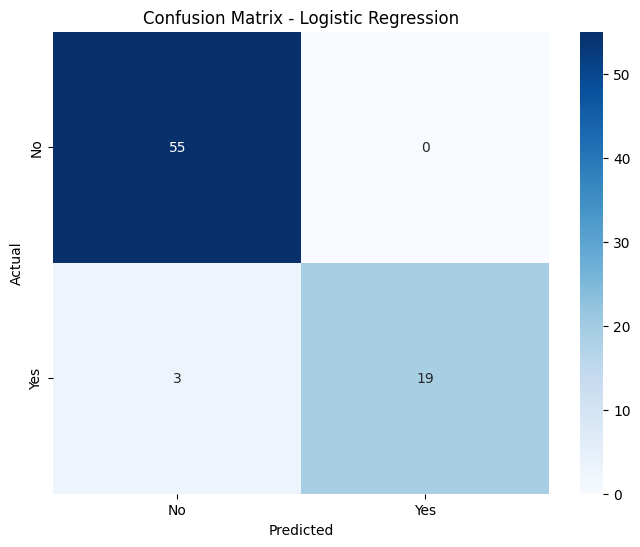

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
best_name

'Logistic Regression'

In [41]:
best_name = "Random Forest"

Top 10 Most Important Features:
                           feature  importance
39  Response_Structural Incomplete    0.297708
37              Response_Excellent    0.116650
23                        Risk_Low    0.115188
31                           N_N1b    0.062701
0                              Age    0.053449
38          Response_Indeterminate    0.048419
15                   Adenopathy_No    0.044117
22               Risk_Intermediate    0.032552
21              Focality_Uni-Focal    0.020943
1                         Gender_M    0.018511


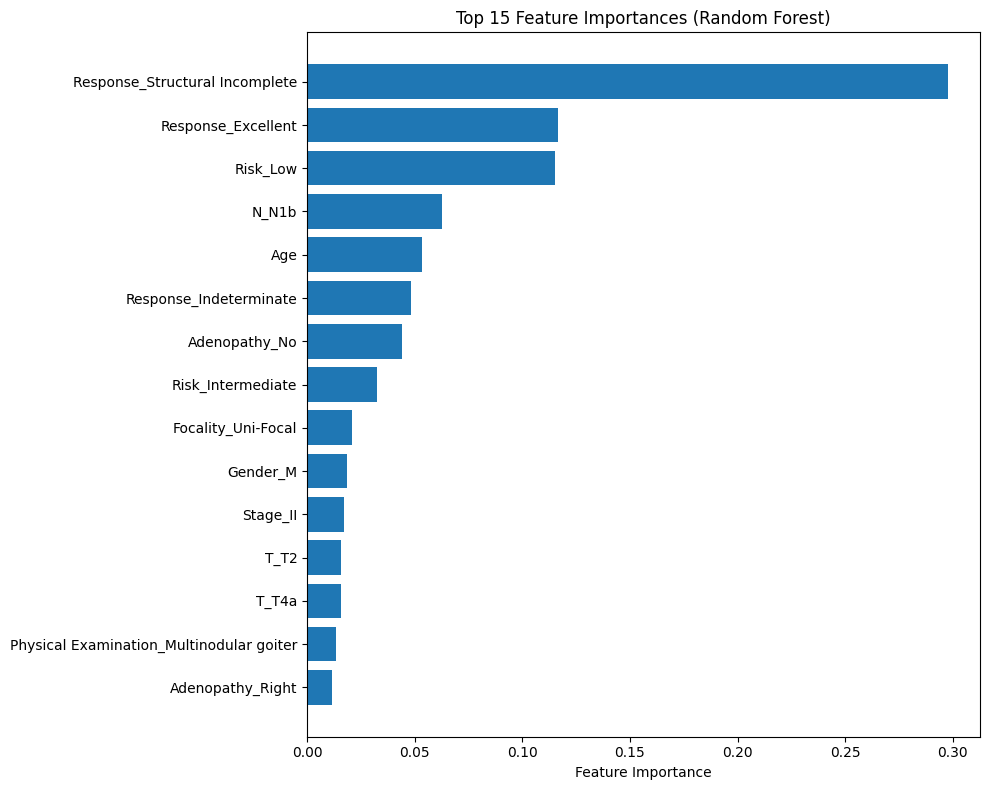

In [42]:
# Let's see feature importance for Random Forest
if best_name == "Random Forest":
    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
